In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
import torch.nn as nn

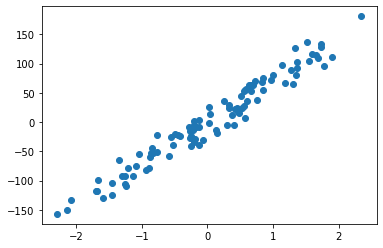

In [2]:
# prepare the data

x_np, y_np = datasets.make_regression(n_samples = 100, n_features = 1,
                                      noise = 15)
plt.scatter(x_np, y_np);

In [3]:
X = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
print(X.shape, y.shape)

torch.Size([100, 1]) torch.Size([100])


In [4]:
y = y.view(-1, 1)
print(y.shape)

torch.Size([100, 1])


In [8]:
n_samples, n_features = X.shape

input_size, output_size = n_features, 1

print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")

n_samples: 100
n_features: 1


In [9]:
# model
class Linear_Regression(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        super(Linear_Regression, self).__init__()
        self.lin = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.lin(x)
    

model = Linear_Regression(input_size, output_size)

In [10]:
# loss and optimizer
learning_rate = 0.5
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

In [11]:
n_iter = 100

for epoch in range(n_iter):
    # model prediction
    y_pred = model(X)
    
    # loss calculation
    loss = criterion(y_pred, y)
    
    # calculate the gradients
    loss.backward()
    
    # update the weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"#epoch={epoch + 1}  /////__//// loss={loss.item():.3f}")

#epoch=1  /////__//// loss=5351.374
#epoch=11  /////__//// loss=241.494
#epoch=21  /////__//// loss=241.494
#epoch=31  /////__//// loss=241.494
#epoch=41  /////__//// loss=241.494
#epoch=51  /////__//// loss=241.494
#epoch=61  /////__//// loss=241.494
#epoch=71  /////__//// loss=241.494
#epoch=81  /////__//// loss=241.494
#epoch=91  /////__//// loss=241.494


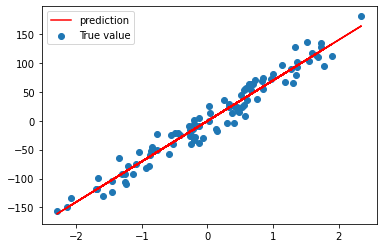

In [12]:
y_pred = model(X).detach().numpy()

plt.plot(x_np, y_pred, 'r', label = "prediction")
plt.scatter(x_np, y_np, label = "True value")
plt.legend()
plt.show()

## Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [14]:
# 0) prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(f"n_samples = {n_samples}")
print(f"n_features = {n_features}")

n_samples = 569
n_features = 30


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 1234)
print(X_train.shape[0], X_test.shape[0])

455 114


In [16]:
# scale the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [59]:
# 1) model

class Logistic_Regression(nn.Module):
    
    def __init__(self, n_input):
        super(Logistic_Regression, self).__init__()
        self.lin = nn.Linear(n_input, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.lin(x))
        return y_pred
    
model = Logistic_Regression(n_features)   

In [60]:
# 2) loss and optimizer
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

In [61]:
#) training_loop

num_epochs = 1_000

for epoch in range(num_epochs):
    
    #forward pass
    prediction = model(X_train)
    
    # loss calculation
    loss = criterion(prediction, y_train)
    
    # loss gradients
    loss.backward()
    
    # update the weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f"    #epoch = {epoch+1}, loss = {loss.item():.3f}")

    #epoch = 100, loss = 0.086
    #epoch = 200, loss = 0.067
    #epoch = 300, loss = 0.059
    #epoch = 400, loss = 0.054
    #epoch = 500, loss = 0.050
    #epoch = 600, loss = 0.047
    #epoch = 700, loss = 0.045
    #epoch = 800, loss = 0.043
    #epoch = 900, loss = 0.042
    #epoch = 1000, loss = 0.040


In [62]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_class = y_predicted.round()
    acc = y_predicted_class.eq(y_test).sum()/float(y_test.shape[0])
    print(f"accuracy = {acc:.4f}")

accuracy = 0.9561
